In [234]:
import pandas as pd
import psycopg2


In [236]:
df = pd.read_csv("cleaned_IT_Help_Desk_Tickets.csv")

In [238]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [240]:
df.head()

,ticket_id,request_id,requestor_seniority,filed_against,ticket_type,severity,priority,max_days
0,1,1929,1 - Junior,Systems,Issue,2 - Normal,0 - Unassigned,3
1,2,1587,2 - Regular,Software,Request,1 - Minor,1 - Low,5
2,3,925,2 - Regular,Access/Login,Request,2 - Normal,0 - Unassigned,0
3,4,413,4 - Management,Systems,Request,2 - Normal,0 - Unassigned,20
4,5,318,1 - Junior,Access/Login,Request,2 - Normal,1 - Low,1


In [242]:
conn = psycopg2.connect(
    dbname="it_support_db",
    user="postgres",
    password="password",
    host="localhost",
    port="5432"
)
cur = conn.cursor()

In [244]:
cur.execute("""
    CREATE TABLE IF NOT EXISTS tickets (
        ticket_id SERIAL PRIMARY KEY,
        request_id INT,
        requestor_seniority VARCHAR(50),
        filed_against VARCHAR(100),
        ticket_type VARCHAR(50),
        severity VARCHAR(50),
        priority VARCHAR(50),
        max_days INT
    );
""")
conn.commit()



In [246]:
for _, row in df.iterrows():
    cur.execute("""
        INSERT INTO tickets (request_id, requestor_seniority, filed_against, ticket_type, severity, priority, max_days)
        VALUES (%s, %s, %s, %s, %s, %s, %s)
    """, (row["request_id"], row["requestor_seniority"], row["filed_against"],
          row["ticket_type"], row["severity"], row["priority"], row["max_days"]))

conn.commit()  # Save changes
print("Data inserted successfully!")


Data inserted successfully!


In [247]:
cur.execute("SELECT * FROM tickets LIMIT 5;")
rows = cur.fetchall()
for row in rows:
    print(row)


(1, 1929, '1 - Junior', 'Systems', 'Issue', '2 - Normal', '0 - Unassigned', 3)
(2, 1587, '2 - Regular', 'Software', 'Request', '1 - Minor', '1 - Low', 5)
(3, 925, '2 - Regular', 'Access/Login', 'Request', '2 - Normal', '0 - Unassigned', 0)
(4, 413, '4 - Management', 'Systems', 'Request', '2 - Normal', '0 - Unassigned', 20)
(5, 318, '1 - Junior', 'Access/Login', 'Request', '2 - Normal', '1 - Low', 1)


In [248]:
# Load data into a DataFrame
df = pd.read_sql("SELECT * FROM tickets;", conn)

C:\Users\91776\AppData\Local\Temp\ipykernel_10888\2497482717.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM tickets;", conn)


In [252]:
df.head()

,ticket_id,request_id,requestor_seniority,filed_against,ticket_type,severity,priority,max_days
0,1,1929,1 - Junior,Systems,Issue,2 - Normal,0 - Unassigned,3
1,2,1587,2 - Regular,Software,Request,1 - Minor,1 - Low,5
2,3,925,2 - Regular,Access/Login,Request,2 - Normal,0 - Unassigned,0
3,4,413,4 - Management,Systems,Request,2 - Normal,0 - Unassigned,20
4,5,318,1 - Junior,Access/Login,Request,2 - Normal,1 - Low,1


In [254]:
print(df.info())  # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ticket_id            300000 non-null  int64 
 1   request_id           300000 non-null  int64 
 2   requestor_seniority  300000 non-null  object
 3   filed_against        300000 non-null  object
 4   ticket_type          300000 non-null  object
 5   severity             300000 non-null  object
 6   priority             300000 non-null  object
 7   max_days             300000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 18.3+ MB
None


In [256]:
print(df.describe())  # Summary statistics

           ticket_id     request_id       max_days
count  300000.000000  300000.000000  300000.000000
mean   150000.500000     999.657700       6.838220
std     86602.684716     579.557805       7.389549
min         1.000000       1.000000       0.000000
25%     75000.750000     497.000000       1.000000
50%    150000.500000     999.000000       5.000000
75%    225000.250000    1503.000000      10.000000
max    300000.000000    2000.000000      54.000000


In [258]:
print(df["severity"].value_counts())  # Frequency of different severity levels

severity
2 - Normal          272730
3 - Major            14802
1 - Minor             7326
4 - Critical          4212
0 - Unclassified       930
Name: count, dtype: int64


In [260]:
print(df["ticket_type"].value_counts())  # Count of issue vs. request"

ticket_type
Request    225534
Issue       74466
Name: count, dtype: int64


In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\91776\AppData\Local\Temp\ipykernel_10888\2900234163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["severity"], palette="viridis")


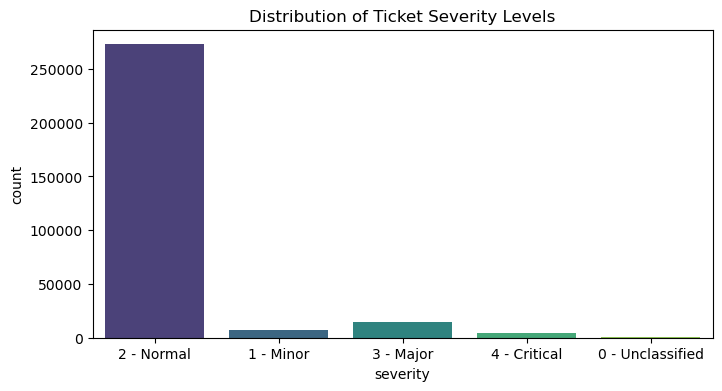

In [266]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df["severity"], palette="viridis")
plt.title("Distribution of Ticket Severity Levels")
plt.show()

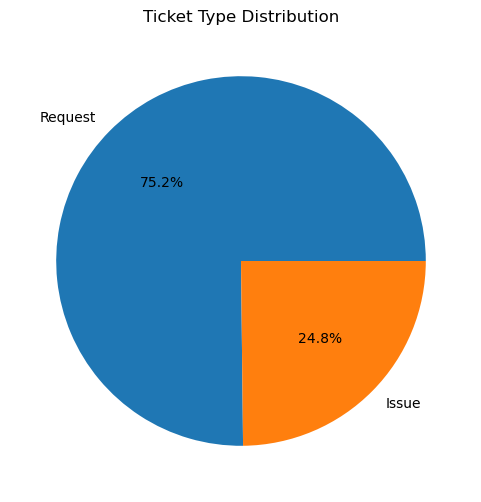

In [268]:
df["ticket_type"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6))
plt.title("Ticket Type Distribution")
plt.ylabel("")
plt.show()


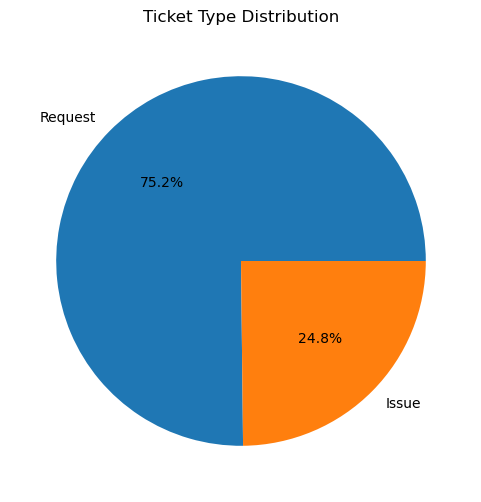

In [270]:
df["ticket_type"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6))
plt.title("Ticket Type Distribution")
plt.ylabel("")
plt.show()

C:\Users\91776\AppData\Local\Temp\ipykernel_10888\1617220982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["priority"], y=df["max_days"], palette="coolwarm")


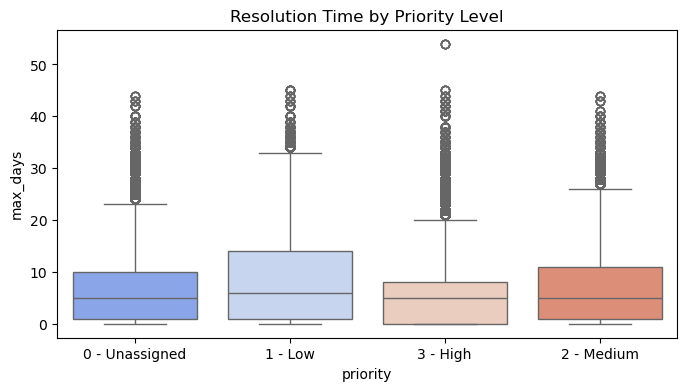

In [272]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["priority"], y=df["max_days"], palette="coolwarm")
plt.title("Resolution Time by Priority Level")
plt.show()


In [274]:
import seaborn as sns
import matplotlib.pyplot as plt

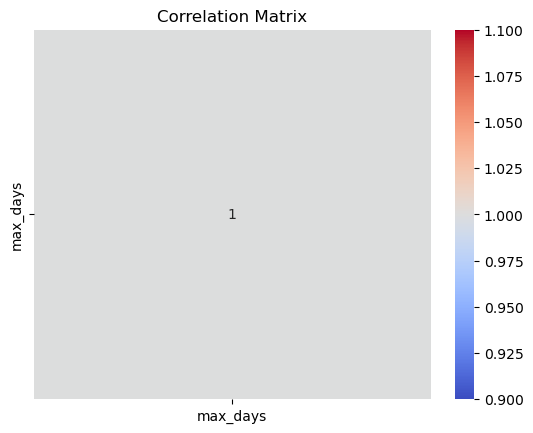

In [276]:
# Calculate correlation matrix (if numeric features are available)
corr = df[['max_days']].corr()  # Add more numeric columns if available
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [278]:
# Group by ticket type and priority
grouped = df.groupby(['ticket_type', 'priority']).agg({'max_days': ['mean', 'median', 'count']})
print(grouped)


                            max_days              
                                mean median  count
ticket_type priority                              
Issue       0 - Unassigned  3.601815    2.0  22482
            1 - Low         4.678060    3.0  12990
            2 - Medium      4.021151    3.0  12198
            3 - High        3.180027    2.0  26796
Request     0 - Unassigned  7.870277    6.0  67806
            1 - Low         9.847246    8.0  38022
            2 - Medium      8.211567    6.0  36726
            3 - High        6.818727    6.0  82980


In [282]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd



In [286]:
# Let's assume you've done some preprocessing and have your features (X) and target (y)
# For example, encoding categorical features using pd.get_dummies:
features = ['ticket_type', 'severity', 'priority']  # Extend as needed
X = pd.get_dummies(df[features])
y = df['max_days']



In [288]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [291]:
# Build a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [293]:
# Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 50.62
